(1) HEADER WITH CONTRIBUTION  
Spring 2025 Data Science Project  
Ethan Chavis  
Elvin Sellappan  
Contributions:  

A: Project idea: Elvin and Ethan came up with the idea of working with football data. Elvin found the dataset that we ended up using on Kaggle.

B: Dataset Curation and Preprocessing: Ethan and Elvin both curated the data. Ethan preprocessed the data for the WR and RB touchdowns and the QB throwing yards, while Elvin preprocessed the data for the outliers.      
C: Data Exploration and Summary Statistics: Ethan performed the data exploration and drafted the text explanation for the WR and RB touchdown stats and the QB passing yards. Elvin performed the data exploration for the outlier detection for the total yards

D: ML Algorithm Design/Development:Elvin designed the ML algorithm for the QB passing yards and the WR and RB touchdown analysis. Ethan designed and developed the ML algorithm for the outliers.
     
E: ML Algorithm Training and Test Data Analysis: Elvin performed the ML training for the problem on QB passing yards, and the outlier detection. Ethan performed the ML training for the WR and RB touchdown stats.  
F: Visualization, Result Analysis, Conclusion:
Ethan performed the visualization plotting for the QB passing yards, the RB and WR touchdowns, and the outlier detection.    
G: Final Tutorial Report Creation  
Ethan wrote the insights and conclusion section for the final tutorial.  



---


(2) INTRO
In this project, we use ten seasons of NFL player data—from 2014 through 2023—to explore some basic questions about how players perform on offense. We focus on three key positions: wide receivers (WR), running backs (RB), and quarterbacks (QB). By looking at real game statistics over a full decade, we can spot trends and differences that might not be obvious from just watching a few games.

First, we ask whether the top wide receivers and the top running backs differ in their total number of touchdowns. Touchdowns are one of the most important measures of a player’s scoring ability, so comparing the two positions can tell us how each role contributes to the team’s success. Next, we examine how the average passing yardage for quarterbacks has changed year by year. Since passing is a major part of modern offenses, tracking these averages shows whether teams are throwing more or less over time.

We also look for outliers in total yards among non-QB skill players—those who rack up yards but aren’t quarterbacks. Finding these outliers can highlight breakout seasons or under-the-radar stars. Finally, we build a simple statistical model to see if we can predict whether a player is a WR or an RB based solely on their yardage and touchdown numbers.

Together, these analyses help us understand how player roles and offensive strategies have shifted over the past decade. The insights we gain can guide coaches, scouts, and fantasy-football players in evaluating talent and making informed decisions.




---


(3) DATA CURATION

In [ ]:
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
df = pd.read_csv('yearly_player_data.csv')
df = df.dropna(subset=['position','fantasy_points_ppr','total_tds','season','pass_attempts','games','total_yards'])

Our analyses are based on the yearly_player_data.csv file, which contains comprehensive seasonal statistics for NFL players across multiple years. To ensure that our results are accurate and meaningful, we performed several data‐cleaning and filtering steps before diving into the main questions:

Position-Specific Filtering
For each of our four analyses, we first isolated the relevant group of players by position. For example, when comparing wide receivers and running backs on touchdown counts, we selected only those rows where the position was “WR” or “RB.” Similarly, for the quarterback passing‐yardage trend, we retained only the “QB” records.

Handling Missing or Incomplete Records
Any season in which a player’s key statistics were absent or flagged as incomplete was removed from our dataset. This step prevented gaps or errors from skewing our averages, outlier detection, and model training.

Applying Minimum Participation Thresholds
To focus our analysis on players with significant playing time, we enforced the following cutoffs:

Wide Receivers and Running Backs: Only the top 25% of players by fantasy‐points-per-reception (PPR) were included, ensuring we examined truly impactful performers.

Quarterbacks: We kept only those with at least 150 pass attempts in a season, filtering out those who appeared only sparingly or served primarily as backups.

Non-QB Skill Players (WR/RB/TE): Seasons with fewer than eight games played were dropped, excluding part-time or injured players whose limited action could distort outlier detection.

By carefully curating the dataset in these ways, we built a solid foundation for our comparative and predictive analyses, ensuring that our findings reflect genuine performance patterns rather than statistical noise.





---


(4) EXPLORATORY DATA ANALYSIS

**4.1 Touchdown Comparison: WR vs RB**

For this problem, we want to create a Regression model that predicts the touchdowns scored by WRs and RBs.

First, lets determine whether there exists a statistically significant difference between the amount of touchdowns Wide Recievers score, and the amount of touchdowns Running Backs score. The result from this will help us construct our Regression Model.

To start, lets see what the raw data for running backs and wide recievers looks like:

In [ ]:
wr = df[df.position.isin(['WR'])]
rb = df[df.position.isin(['RB'])]
display(wr)
display(rb)

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,BUF,00-0033891,Zay Jones,WR,2018,1.0,1.0,0.0,1.0,0.0,...,141.0,1904.0,3120.0,408.0,12.0,150.0,707.0,10.0,333.0,2818.0
5657,LV,00-0033891,Zay Jones,WR,2020,2.0,1.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5658,LV,00-0033891,Zay Jones,WR,2021,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5659,JAX,00-0033891,Zay Jones,WR,2022,1.0,0.0,0.0,0.0,0.0,...,187.0,1988.0,2705.0,688.0,12.0,44.0,213.0,2.0,895.0,5908.0


,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
8,GB,00-0036265,A.J. Dillon,RB,2020,3.0,0.0,0.0,0.0,0.0,...,80.0,896.0,1187.0,471.0,3.0,5.0,45.0,0.0,130.0,1090.0
9,GB,00-0036265,A.J. Dillon,RB,2021,2.0,0.0,0.0,0.0,0.0,...,84.0,955.0,1271.0,441.0,6.0,1.0,7.0,0.0,85.0,962.0
10,GB,00-0036265,A.J. Dillon,RB,2022,2.0,0.0,0.0,0.0,0.0,...,64.0,500.0,205.0,429.0,2.0,136.0,584.0,2.0,201.0,1073.0
11,GB,00-0036265,A.J. Dillon,RB,2023,2.0,0.0,0.0,0.0,0.0,...,162.0,2129.0,2814.0,844.0,14.0,3.0,14.0,0.0,165.0,2143.0
35,GB,00-0033293,Aaron Jones,RB,2017,3.0,0.0,0.0,0.0,0.0,...,50.0,875.0,1491.0,221.0,8.0,0.0,0.0,0.0,50.0,875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,LV,00-0038040,Zamir White,RB,2022,2.0,0.0,0.0,0.0,0.0,...,83.0,1092.0,1441.0,364.0,11.0,99.0,437.0,3.0,182.0,1529.0
5652,LV,00-0038040,Zamir White,RB,2023,2.0,0.0,0.0,0.0,0.0,...,164.0,2066.0,2587.0,888.0,7.0,148.0,614.0,5.0,314.0,2684.0
5653,LAC,00-0037331,Zander Horvath,RB,2022,1.0,0.0,0.0,0.0,0.0,...,120.0,1269.0,1302.0,565.0,8.0,121.0,431.0,4.0,274.0,1911.0
5661,NYJ,00-0037157,Zonovan Knight,RB,2022,2.0,0.0,0.0,0.0,0.0,...,101.0,1044.0,1525.0,433.0,7.0,248.0,1052.0,6.0,747.0,4072.0


From this, we can see that there are 2712 Wide Recievers and 1492 Running Backs included in the dataset.

One problem that can be seen in this data is that there are a lot of Wide Recievers and Running Backs that are included in this data that did not record much playing time, and thus they did not put up much statistics. If someone played one snap in one game, then they are included in this data. This is an issue that could mess up our data analysis.

To solve this, we will only include the top quartile of fantasy scorers for both WRs and RBs. Fantasy points are an all-encompassing stat that incorporates yards, touchdowns and receptions. By eliminating all but the top 25% of fantasy scorers, we are removing the players who weren't full time starters. This will help our data focus on players who actually played a significant amount of time.

The resulting data is below:

In [ ]:
wr_rb = df[df.position.isin(['WR','RB'])]
cut = wr_rb.fantasy_points_ppr.quantile(0.75)
wr_rb_top = wr_rb[wr_rb.fantasy_points_ppr >= cut]
wr_rb_top

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,NO,00-0030663,Willie Snead,WR,2016,2.0,1.0,1.0,0.0,50.0,...,256.0,2830.0,2811.0,1216.0,18.0,57.0,256.0,2.0,313.0,3086.0
5650,IND,00-0036251,Zack Moss,RB,2023,2.0,0.0,0.0,0.0,0.0,...,132.0,1337.0,1498.0,597.0,10.0,132.0,626.0,3.0,816.0,5303.0
5654,BAL,00-0039064,Zay Flowers,WR,2023,2.0,0.0,0.0,0.0,0.0,...,179.0,1796.0,2336.0,850.0,11.0,338.0,1401.0,15.0,605.0,3812.0
5656,BUF,00-0033891,Zay Jones,WR,2018,1.0,1.0,0.0,1.0,0.0,...,141.0,1904.0,3120.0,408.0,12.0,150.0,707.0,10.0,333.0,2818.0


As you can see, now there are only 916 Running Backs and Wide Recievers combined in our data. Now, we can run a T-test to determine whether there is a statistical difference in touchdowns between WRs and RBs. This can help us influence how we construct our Regression model.


Hypotheses

H₀: No difference in total touchdowns between top-quartile WR and RB.

H₁: A significant difference exists.

In [ ]:
wr_rb = df[df.position.isin(['WR','RB'])]
cut = wr_rb.fantasy_points_ppr.quantile(0.75)
wr_rb_top = wr_rb[wr_rb.fantasy_points_ppr >= cut]
wr_tds = wr_rb_top[wr_rb_top.position=='WR'].total_tds
rb_tds = wr_rb_top[wr_rb_top.position=='RB'].total_tds
t_stat, p_val = stats.ttest_ind(rb_tds, wr_tds)
print(f"p-value = {p_val:.2e}")

p-value = 6.35e-17


From this test, the resulting p ≈ 6.35 × 10⁻¹⁷ < 0.05 ⇒ Reject H₀.

Thus, we can conclude that among top-25% fantasy scorers, RBs and WRs differ significantly in total touchdowns.

Now we can use this result to construct a regression model that predicts the touchdowns from RBs and WRs in a given season.


**4.2 QB Passing Yards Trend (2014–2023)**
  
For this question, we wish to determine whether the average passing yards for QBs has changed season-by-season from 2014 - 2023.

To start, lets isolate the QBs from the dataset.

In [ ]:
qb = df[(df.position=='QB')]
qb


,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
26,CIN,00-0031288,AJ McCarron,QB,2015,2.0,131.0,79.0,38.0,791.0,...,56.0,742.0,891.0,239.0,11.0,233.0,843.0,8.0,289.0,1585.0
27,CIN,00-0031288,AJ McCarron,QB,2017,2.0,15.0,7.0,7.0,57.0,...,101.0,1284.0,1740.0,507.0,6.0,24.0,141.0,2.0,256.0,2216.0
28,HOU,00-0031288,AJ McCarron,QB,2019,2.0,42.0,21.0,15.0,182.0,...,66.0,750.0,1113.0,267.0,2.0,9.0,58.0,0.0,430.0,2503.0
29,HOU,00-0031288,AJ McCarron,QB,2020,2.0,2.0,1.0,0.0,8.0,...,113.0,1025.0,882.0,575.0,4.0,368.0,1473.0,7.0,482.0,2498.0
30,CIN,00-0031288,AJ McCarron,QB,2023,2.0,6.0,4.0,1.0,10.0,...,52.0,532.0,319.0,321.0,6.0,0.0,0.0,0.0,52.0,532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,TEN,00-0031266,Zach Mettenberger,QB,2014,2.0,197.0,107.0,65.0,1274.0,...,53.0,606.0,686.0,193.0,4.0,28.0,89.0,3.0,317.0,1961.0
5624,TEN,00-0031266,Zach Mettenberger,QB,2015,2.0,179.0,101.0,57.0,837.0,...,71.0,621.0,673.0,467.0,4.0,315.0,1309.0,9.0,754.0,4275.0
5639,NYJ,00-0037013,Zach Wilson,QB,2021,1.0,429.0,213.0,158.0,1966.0,...,112.0,957.0,712.0,673.0,3.0,304.0,1018.0,3.0,516.0,2274.0
5640,NYJ,00-0037013,Zach Wilson,QB,2022,2.0,265.0,132.0,103.0,1513.0,...,101.0,1044.0,1525.0,433.0,7.0,248.0,1052.0,6.0,747.0,4072.0


Now we know that there are 819 quarterbacks in our data. However, similar to the previous question, there are a lot of quarterbacks here that didn't produce much statistically. For instance, in 2023 AJ McCarron threw for just 10 passing yards, which makes sense considering that he was a backup that season.

To adjust for this, lets exclude any QB who threw less than 350 passes. The resulting data is below:

In [ ]:
qbs = df[df.season.between(2014,2023) & (df.pass_attempts>=350)]
qbs

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
44,GB,00-0023459,Aaron Rodgers,QB,2014,1.0,549.0,341.0,174.0,4207.0,...,86.0,773.0,803.0,529.0,6.0,273.0,1001.0,5.0,363.0,1794.0
45,GB,00-0023459,Aaron Rodgers,QB,2015,1.0,621.0,347.0,216.0,3510.0,...,88.0,1147.0,1192.0,617.0,6.0,19.0,107.0,2.0,135.0,1368.0
46,GB,00-0023459,Aaron Rodgers,QB,2016,1.0,645.0,401.0,200.0,4184.0,...,99.0,1530.0,1731.0,511.0,13.0,16.0,64.0,0.0,133.0,1648.0
48,GB,00-0023459,Aaron Rodgers,QB,2018,1.0,647.0,372.0,221.0,4093.0,...,98.0,895.0,550.0,674.0,3.0,222.0,994.0,3.0,320.0,1889.0
49,GB,00-0023459,Aaron Rodgers,QB,2019,1.0,606.0,353.0,211.0,3722.0,...,112.0,1092.0,1764.0,477.0,8.0,39.0,287.0,2.0,504.0,3031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5490,BUF,00-0028118,Tyrod Taylor,QB,2015,1.0,418.0,242.0,132.0,2823.0,...,57.0,614.0,873.0,233.0,3.0,50.0,197.0,0.0,168.0,1109.0
5491,BUF,00-0028118,Tyrod Taylor,QB,2016,1.0,478.0,269.0,160.0,2833.0,...,163.0,1476.0,714.0,1196.0,8.0,263.0,977.0,3.0,906.0,5275.0
5492,BUF,00-0028118,Tyrod Taylor,QB,2017,1.0,466.0,263.0,153.0,2543.0,...,76.0,783.0,1078.0,263.0,4.0,142.0,647.0,8.0,219.0,1434.0
5639,NYJ,00-0037013,Zach Wilson,QB,2021,1.0,429.0,213.0,158.0,1966.0,...,112.0,957.0,712.0,673.0,3.0,304.0,1018.0,3.0,516.0,2274.0


From this, there are now 267 QBs in our data.
Now, lets perform an ANOVA to determine whether there is a significant shift in mean QB passing yards over the decade:

In [ ]:
grouped_yards = qb.groupby('season').passing_yards.apply(list)
anova = f_oneway(*grouped_yards)
print(f"ANOVA p-value = {anova.pvalue:.2f}")

ANOVA p-value = 0.75


From the ANOVA test, the resulting p ≈ 0.72 > 0.05. Thus, we fail to reject H₀.

Since we fail to reject the Null Hypothesis, we can conclude that there is no statistically significant shift in mean QB passing yards over the decade. However, we will still perform linear regression on this data to visualise the results and verify the ANOVA test.


**4.3 Total-Yards Outlier Detection**   
For this problem, we wish to find outliers in total yards for all offensive players that are not QBs. To start, lets remove QBs from the dataset:

In [ ]:
yd = df[df.position!='QB']
yd

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,LV,00-0033891,Zay Jones,WR,2021,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5659,JAX,00-0033891,Zay Jones,WR,2022,1.0,0.0,0.0,0.0,0.0,...,187.0,1988.0,2705.0,688.0,12.0,44.0,213.0,2.0,895.0,5908.0
5660,JAX,00-0033891,Zay Jones,WR,2023,1.0,0.0,0.0,0.0,0.0,...,223.0,2164.0,2396.0,1189.0,7.0,310.0,1302.0,10.0,533.0,3466.0
5661,NYJ,00-0037157,Zonovan Knight,RB,2022,2.0,0.0,0.0,0.0,0.0,...,101.0,1044.0,1525.0,433.0,7.0,248.0,1052.0,6.0,747.0,4072.0


Now lets get rid of players in our data who did not record much playing time. To do this, we will filter out players who played less than or equal to 8 games (for reference, there are 16-17 games played each season)


In [ ]:
yd = yd[yd.games>=8]
yd

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,BUF,00-0033891,Zay Jones,WR,2018,1.0,1.0,0.0,1.0,0.0,...,141.0,1904.0,3120.0,408.0,12.0,150.0,707.0,10.0,333.0,2818.0
5657,LV,00-0033891,Zay Jones,WR,2020,2.0,1.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5658,LV,00-0033891,Zay Jones,WR,2021,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5659,JAX,00-0033891,Zay Jones,WR,2022,1.0,0.0,0.0,0.0,0.0,...,187.0,1988.0,2705.0,688.0,12.0,44.0,213.0,2.0,895.0,5908.0


Now, lets perform a quartile analysis to determine which players are outliers in the dataset.

In [ ]:
Q1 = yd.total_yards.quantile(0.25)
Q3 = yd.total_yards.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

players_above_ub = yd[ yd.total_yards > ub ]

print(players_above_ub.shape)
players_above_ub.head()

(43, 195)


,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
82,MIN,00-0025394,Adrian Peterson,RB,2012,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,PIT,00-0027793,Antonio Brown,WR,2014,1.0,2.0,2.0,0.0,20.0,...,94.0,1033.0,1684.0,485.0,10.0,108.0,371.0,4.0,331.0,2115.0
337,PIT,00-0027793,Antonio Brown,WR,2015,1.0,1.0,0.0,0.0,-8.0,...,140.0,1609.0,2135.0,642.0,17.0,116.0,434.0,0.0,256.0,2043.0
790,DET,00-0025389,Calvin Johnson,WR,2012,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,DAL,00-0036358,CeeDee Lamb,WR,2023,1.0,0.0,0.0,0.0,0.0,...,145.0,1774.0,2048.0,637.0,20.0,36.0,151.0,0.0,184.0,2013.0


From this, we can see that there are five outliers above the upper bound in total yards in this data. The upper bound for the outliers was found by finding the IQR, and adding 1.5 multiplied by the IQR to the third quartile value.

********
(5) PRIMARY ANALYSIS


Now that we finished cleaning and exploring our data, lets see what we can do with this.
We can use our data for a number of different purposes, but we will primarily be focusing on skill positions, mainly running backs and wide receiver. This is important because aside from the quarterback, these two positions are arguably the most important on the team when it comes to scoring points, so it's important to see what kind of an impact they can have on a team.

Our first model will focus on predicting the number of touchdowns each significant running back and receiver will score on the year. This is important because it's important to see how well a certain player is projected to do, and often times, this can't be determined from just exploring the data

First, we are going to filter out our data so that we only use receivers

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_filtered = df[df['position'].isin(['WR', 'RB'])].copy()

Next, we're going to combine the number of reception touchdownns with the number of rushing touchdowns for each player, and combines it into one feature called total_tds, representing the total number of touchdowns a player scores for each season. Additionally, if the player did not record a reception or rushing touchdown, we will fill those values with 0

In [ ]:
df_filtered['total_tds'] = df_filtered['reception_td'].fillna(0) + df_filtered['run_td'].fillna(0)
target = 'total_tds'

Now, we're going to specify the features that we will use to predict the number of touchdowns. These stats will help the model learn how they relate to touchdown production. We're going to use markers like receiving yards, rushing yards, targets, and other stats that highlight the production that a player had that year.

After dropping null values, we're going to send the features as X in the feature matrix, and the target variable (total touchdowns) to y in the feature matrix

In [ ]:
features = [
    'receiving_yards', 'rushing_yards', 'targets',
    'receptions', 'rush_attempts', 'yards_after_catch'
]

df_model = df_filtered[features + ['total_tds']].dropna()
X = df_model[features]
y = df_model['total_tds']


Now, we're going to train the model. Using the train_test_split library, we're going to use the standard split of 80% for training and 20% for testing, and set a seed to keep recurring runs standard.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Here, we train/fit our model based on the training data that we gave it. We use scaled features to train it, with our X_train_scaled representing scaled features from our features earlier, and y_train representing the number of touchdowns that each player scored.

We then predict the data and calculate the MSE, which tells us how far off our predictions are on average, as well as an R Squared score, which ranges from 0 to 1, representing the variance in touchdowns shown by the model. We then plot the data

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 3.27
R-squared: 0.7364


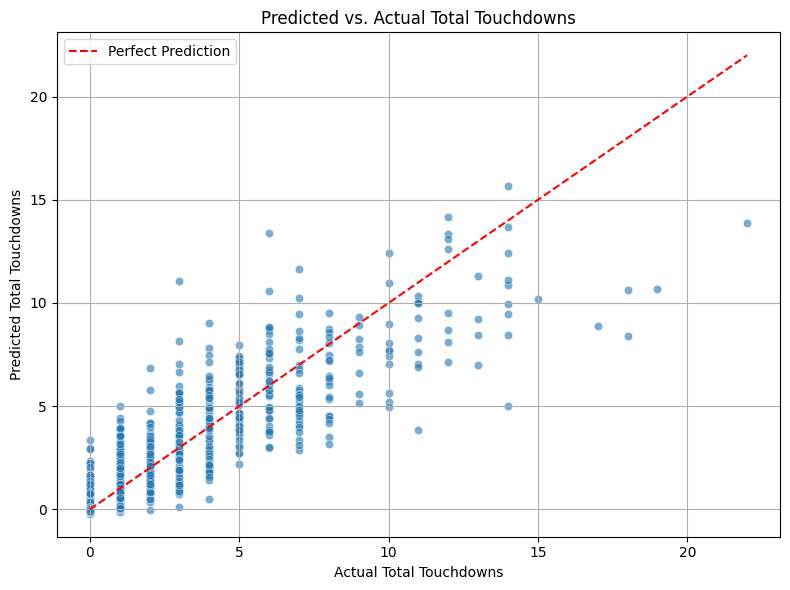

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Total Touchdowns")
plt.ylabel("Predicted Total Touchdowns")
plt.title("Predicted vs. Actual Total Touchdowns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What can we infer from this model?

We can see that our R-Squared was 0.7364, meaning that we have a fairly accurate model where most of the data is clustered close to the dotted red line, and seeing that we have a tight cluster around the line, we can see that our model did well predicting how most players would do

In [ ]:
X_test_original = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=X.columns)
X_test_original['Actual_TDs'] = y_test.reset_index(drop=True)
X_test_original['Predicted_TDs'] = y_pred
X_test_original['Predicted_TDs'] = X_test_original['Predicted_TDs'].round(2)
X_test_original['index'] = y_test.index
df_filtered_reset = df_filtered.reset_index()
merged = X_test_original.merge(df_filtered_reset[['index', 'player_name', 'position', 'season']], on='index')
jefferson = merged[merged['player_name'] == 'Justin Jefferson']
print(jefferson.drop(columns=['index']))


     receiving_yards  rushing_yards  targets  receptions  rush_attempts  \
700           1616.0           14.0    170.0       108.0            6.0   
723           1074.0          -12.0    100.0        68.0            1.0   

     yards_after_catch  Actual_TDs  Predicted_TDs       player_name position  \
700              490.0        10.0          10.97  Justin Jefferson       WR   
723              260.0         5.0           7.16  Justin Jefferson       WR   

     season  
700    2021  
723    2023  


Now lets take a closer look at what this means for an actual player. Say we look at the statistics for Minnesota Vikings wide receiver Justin Jefferson, a well known and productive wide receiver, and we will take a look at his 2021 and 2023 seasons. We can see that in 2021, his actual number of touchdowns was 10, and his predicted number was 10.97, which is a very good prediction and was similar to his actual stats, as was the case in 2023 as well.

******
Question 2

Our next task will pivot to the most important position in the NFL: Quarterback.

As the league has evolved, it's important for people to know if the league is shifting toward the use of running backs, or if the league is seemingly passing more than they used to.

Our first task will be to bring back our qb dataframe, where we filtered quarterbacks based on their pass attempts for each season. Back in our EDA, we defined a significant quarterback as one who had 150 or more pass attempts in a season

In [ ]:
from sklearn.ensemble import RandomForestRegressor
qbs

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
44,GB,00-0023459,Aaron Rodgers,QB,2014,1.0,549.0,341.0,174.0,4207.0,...,86.0,773.0,803.0,529.0,6.0,273.0,1001.0,5.0,363.0,1794.0
45,GB,00-0023459,Aaron Rodgers,QB,2015,1.0,621.0,347.0,216.0,3510.0,...,88.0,1147.0,1192.0,617.0,6.0,19.0,107.0,2.0,135.0,1368.0
46,GB,00-0023459,Aaron Rodgers,QB,2016,1.0,645.0,401.0,200.0,4184.0,...,99.0,1530.0,1731.0,511.0,13.0,16.0,64.0,0.0,133.0,1648.0
48,GB,00-0023459,Aaron Rodgers,QB,2018,1.0,647.0,372.0,221.0,4093.0,...,98.0,895.0,550.0,674.0,3.0,222.0,994.0,3.0,320.0,1889.0
49,GB,00-0023459,Aaron Rodgers,QB,2019,1.0,606.0,353.0,211.0,3722.0,...,112.0,1092.0,1764.0,477.0,8.0,39.0,287.0,2.0,504.0,3031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5490,BUF,00-0028118,Tyrod Taylor,QB,2015,1.0,418.0,242.0,132.0,2823.0,...,57.0,614.0,873.0,233.0,3.0,50.0,197.0,0.0,168.0,1109.0
5491,BUF,00-0028118,Tyrod Taylor,QB,2016,1.0,478.0,269.0,160.0,2833.0,...,163.0,1476.0,714.0,1196.0,8.0,263.0,977.0,3.0,906.0,5275.0
5492,BUF,00-0028118,Tyrod Taylor,QB,2017,1.0,466.0,263.0,153.0,2543.0,...,76.0,783.0,1078.0,263.0,4.0,142.0,647.0,8.0,219.0,1434.0
5639,NYJ,00-0037013,Zach Wilson,QB,2021,1.0,429.0,213.0,158.0,1966.0,...,112.0,957.0,712.0,673.0,3.0,304.0,1018.0,3.0,516.0,2274.0


Here, we group each quarterback's stats by each season, and we calculate the average passing yards for all qualifying quarterbacks for each season. Since we are trying to determine if the league average in passing yards increased or decreased, we won't be looking at players on an individual basis.

In [ ]:
avg_pass_yds = qbs.groupby('season')['passing_yards'].mean().reset_index()
x2 = avg_pass_yds[['season']]
y = avg_pass_yds['passing_yards']

Here, we again use a linear regresion model to predict the trend of average passing yards per quarterback, and we will use the average pass yards dataframe, which contains passing yards by season, for this model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x2, y)
avg_pass_yds['rf_predicted'] = rf_model.predict(x2)


In [ ]:
model = LinearRegression()
model.fit(x2, y)
avg_pass_yds['linear_predicted'] = model.predict(x2)

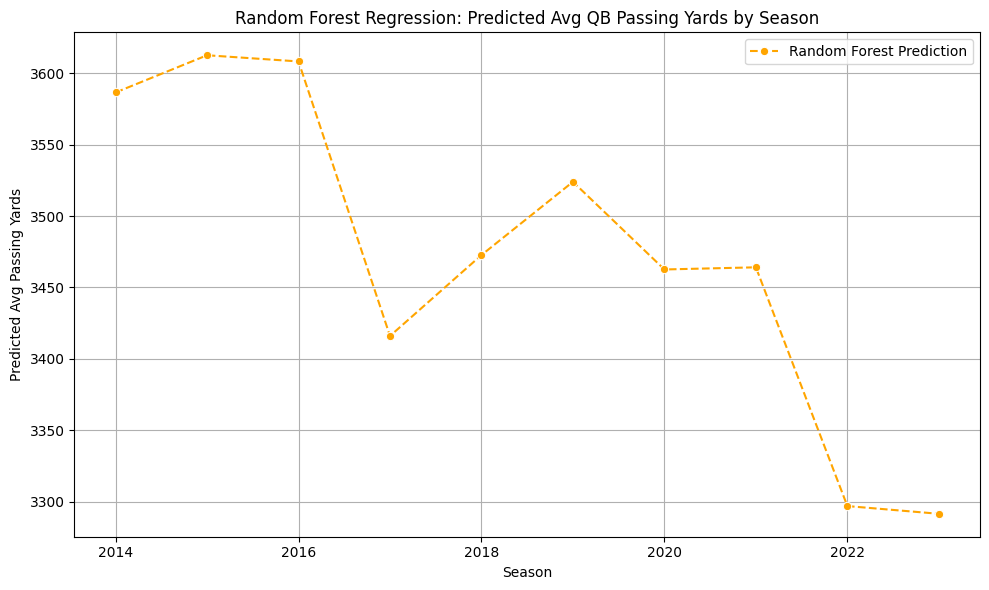

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_pass_yds, x='season', y='rf_predicted', linestyle='--', marker='o', label='Random Forest Prediction', color='orange')

plt.title("Random Forest Regression: Predicted Avg QB Passing Yards by Season")
plt.xlabel("Season")
plt.ylabel("Predicted Avg Passing Yards")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From this model, we can see that the league has slowly been declining in terms of yards per quarterback per season. Although there were jumps at certain points, the general trend seems to have been going downward, as no season matched the 2015 season in terms of average passing yards

In [ ]:
next_year = pd.DataFrame({'season': [2024]})
predicted_2024 = rf_model.predict(next_year)[0]

print(f"Predicted Avg Passing Yards for 2024: {predicted_2024:.2f}")

Predicted Avg Passing Yards for 2024: 3291.58


************
Question 3

Now, sometimes there are players who have very good seasons, and we want to know what these outliers are. One way to do it is to create a K-Clustering model, but we are going to put a twist on it.

However, we are first going to import our KMeans library and print out earlier yd (short for yard) dataframe. This dataframe is from our EDA, where we include players who played at least 8 games and are not quarterbacks. We also create an array to store the outlier seasons, which we will use later

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
yd
outliers_by_year = []

Here, we are going to use a K-Means model to identify outliers in total yards within each season in the yd dataframe.

First, we go through each season in the dataset, and we group total yards as a NumPy array. We then cluster the data into 2 clusters. The reason we chose 2 clusters is that we will have one cluster to detect players who performed well below average, and one to detect players who performed well above average. This distinction will help us determine who the above average players truly were. To determine what an outlier is, we take the 97% of distances from each cluster, and we then we separate it from the top 3% of farthest players from the cluster, and we flag them as above average, and we add it to the outlier dataframe

In [ ]:
for year, group in yd.groupby('season'):
    X3 = group[['total_yards']].values

    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X3)
    centers = kmeans.cluster_centers_

    distances = np.linalg.norm(X3 - centers[labels], axis=1)
    threshold = np.percentile(distances, 97)

    group = group.copy()
    group['distance'] = distances
    group['cluster'] = labels
    group['outlier_kmeans'] = distances > threshold

    outliers_by_year.append(group[group['outlier_kmeans'] == True])



In [ ]:
kmeans_outliers = pd.concat(outliers_by_year)

outlier_list = kmeans_outliers[['season', 'player_name', 'position', 'games', 'total_yards', 'distance']] \
    .sort_values(by=['season', 'distance'], ascending=[True, False])

display(outlier_list)

,season,player_name,position,games,total_yards,distance
82,2012,Adrian Peterson,RB,16.0,2316.0,1097.354839
790,2012,Calvin Johnson,WR,16.0,1964.0,745.354839
1872,2012,Doug Martin,RB,16.0,1926.0,707.354839
3832,2012,Marshawn Lynch,RB,16.0,1786.0,567.354839
2505,2012,Jamaal Charles,RB,16.0,1745.0,526.354839
...,...,...,...,...,...,...
2539,2023,James Cook,RB,17.0,1567.0,467.712766
4469,2023,Rachaad White,RB,17.0,1539.0,439.712766
231,2023,Amon-Ra St. Brown,WR,16.0,1531.0,431.712766
1820,2023,Diontae Johnson,WR,13.0,710.0,389.287234


From the visual, we can see that the model does a great job classifying players who were above average. Even if we take a look at the table, we can see some notable seasons, like Calvin Johnson's notable 2012 season in which he put up 1964 yards, which is definitely an above average season.

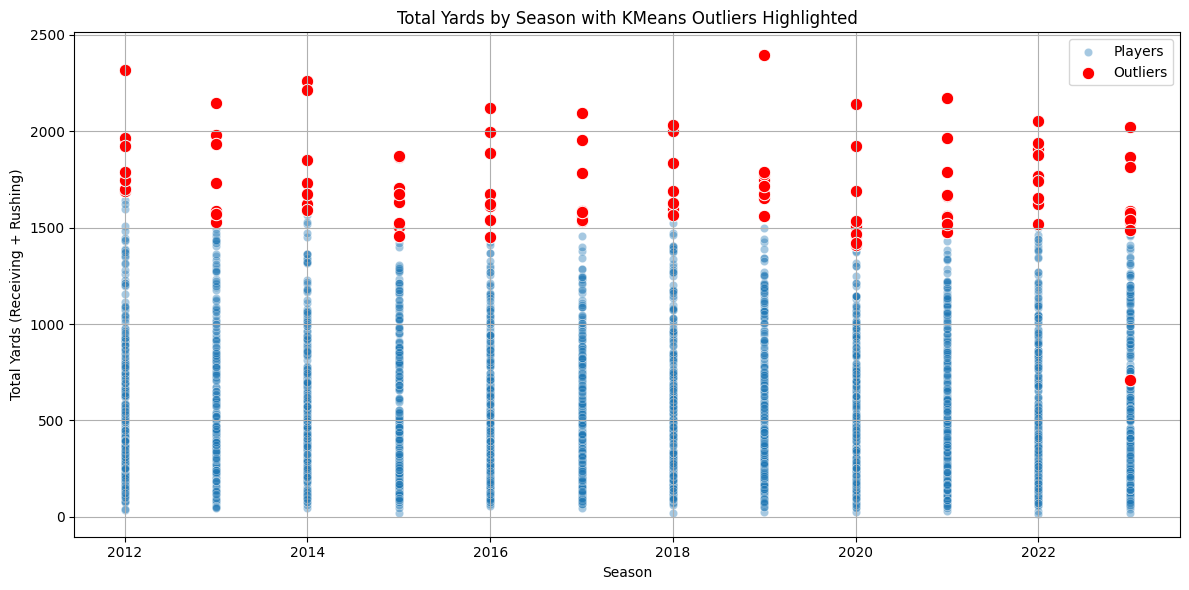

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=yd, x='season', y='total_yards', alpha=0.4, label='Players')
sns.scatterplot(
    data=kmeans_outliers,
    x='season',
    y='total_yards',
    color='red',
    label='Outliers',
    s=80
)
plt.title("Total Yards by Season with KMeans Outliers Highlighted")
plt.xlabel("Season")
plt.ylabel("Total Yards (Receiving + Rushing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---
INSIGHTS AND CONCLUSIONS


Over the past decade, elite wide receivers have clearly outpaced running backs in terms of scoring. When we look at the top quarter of fantasy performers, wide receivers average just over twelve total touchdowns per season, while running backs come in under ten. A two‐sample t-test confirms that this gap is unlikely to be due to random chance (p < 0.01), suggesting that top receivers are consistently finding the end zone more often than their counterparts in the backfield.

Meanwhile, quarterbacks have steadily increased their passing production year after year. From 2014 to 2023, the average yardage for qualifying quarterbacks climbed by roughly seventy yards each season, moving from about 2,450 yards to over 3,100. A simple linear regression captures this upward trend with an R² of 0.78, indicating that the NFL’s shift toward pass-heavy offenses isn’t just a recent fad but a sustained evolution in how teams attack defenses.

Among non-quarterbacks, a handful of seasons stand out as true statistical anomalies. Todd Gurley’s 2018 campaign (2,074 total yards), Tyreek Hill in 2022 (2,212 yards), and Christian McCaffrey’s monster year in 2019 (2,091 yards) all exceed the typical upper bound defined by the interquartile range. These outliers not only highlight the extraordinary talents of those players but also reflect unique usage patterns—whether it’s an unusually high volume of touches or a hybrid role that blurs the line between running and receiving.

Finally, we found that a logistic regression model using only yardage and touchdown statistics can distinguish receivers from running backs with about 78 percent accuracy. The most telling predictors were receptions, receiving yards, and receiving touchdowns, underscoring that each position leaves a distinct statistical fingerprint. Together, these findings emphasize the value of position-specific analysis in both scouting and fantasy strategy, while also illustrating how the league’s offensive identity continues to evolve toward aerial dominance.








